# Modelagem inicial



# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import RegressionExperiment

# Load dataset

In [2]:
data = pd.read_parquet("data/processed/df_model_v02.parquet")

# Setup model

In [3]:

s = RegressionExperiment()
s.setup(
    data, 
    session_id = 123,
    target = 'qualidade_global_media_dada_pela_equipe', 
    categorical_features = ['laboratorio', 'fora_de_tipo_x_tipo_unico'],
    transformation = True,
    transformation_method = 'yeo-johnson',
    transform_target = True,
    transform_target_method = 'yeo-johnson',
    # log_experiment = True,
    # experiment_name = 'CoffeeTree',
)

,Description,Value
0,Session id,123
1,Target,qualidade_global_media_dada_pela_equipe
2,Target type,Regression
3,Original data shape,"(927, 36)"
4,Transformed data shape,"(927, 39)"
5,Transformed train set shape,"(648, 39)"
6,Transformed test set shape,"(279, 39)"
7,Numeric features,33
8,Categorical features,2
9,Preprocess,True


# Compare models

In [4]:
s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1467,0.0448,0.2082,0.9761,0.0299,0.0246,0.1810
et,Extra Trees Regressor,0.1444,0.0455,0.2099,0.9758,0.0307,0.0245,0.0210
gbr,Gradient Boosting Regressor,0.1516,0.0476,0.2153,0.9746,0.0312,0.0256,0.0160
lightgbm,Light Gradient Boosting Machine,0.1571,0.0489,0.2181,0.9739,0.0313,0.0264,0.4480
rf,Random Forest Regressor,0.1503,0.0496,0.2183,0.9736,0.0311,0.0252,0.0250
lr,Linear Regression,0.1721,0.0542,0.2298,0.9710,0.0338,0.0293,0.1760
xgboost,Extreme Gradient Boosting,0.1617,0.0549,0.2308,0.9707,0.0328,0.0270,0.0160
br,Bayesian Ridge,0.1690,0.0550,0.2310,0.9706,0.0340,0.0288,0.0080
ridge,Ridge Regression,0.1796,0.0649,0.2511,0.9654,0.0366,0.0305,0.0720
ada,AdaBoost Regressor,0.2047,0.0744,0.2686,0.9604,0.0378,0.0343,0.0140


# create model

## catboost

In [5]:
catboost = s.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1152,0.0263,0.1621,0.9867,0.0269,0.0219
1,0.1460,0.0427,0.2065,0.9765,0.0296,0.0247
2,0.1410,0.0340,0.1844,0.9838,0.0276,0.0244
3,0.1335,0.0408,0.2021,0.9770,0.0272,0.0212
4,0.1863,0.0650,0.2550,0.9669,0.0374,0.0304
5,0.1133,0.0270,0.1642,0.9850,0.0250,0.0196
6,0.1294,0.0337,0.1837,0.9811,0.0245,0.0206
7,0.1859,0.0652,0.2554,0.9642,0.0345,0.0300
8,0.1356,0.0377,0.1941,0.9804,0.0264,0.0222


## lightgbm

In [6]:
lightgbm = s.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1418,0.0361,0.1900,0.9818,0.0294,0.0258
1,0.1538,0.0418,0.2045,0.9770,0.0286,0.0253
2,0.1438,0.0355,0.1884,0.9831,0.0279,0.0253
3,0.1375,0.0427,0.2066,0.9760,0.0274,0.0215
4,0.2025,0.0743,0.2726,0.9622,0.0398,0.0330
5,0.1337,0.0316,0.1779,0.9824,0.0269,0.0232
6,0.1408,0.0423,0.2057,0.9763,0.0285,0.0228
7,0.1799,0.0643,0.2535,0.9647,0.0348,0.0292
8,0.1430,0.0374,0.1933,0.9806,0.0271,0.0239


## xgboost

In [7]:
xgboost = s.create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1432,0.0400,0.1999,0.9798,0.0300,0.0259
1,0.1370,0.0386,0.1964,0.9787,0.0277,0.0230
2,0.1626,0.0420,0.2050,0.9800,0.0310,0.0285
3,0.1579,0.0537,0.2318,0.9698,0.0305,0.0247
4,0.1872,0.0741,0.2723,0.9623,0.0390,0.0305
5,0.1598,0.0502,0.2240,0.9721,0.0329,0.0277
6,0.1471,0.0453,0.2129,0.9747,0.0295,0.0237
7,0.1733,0.0595,0.2439,0.9674,0.0327,0.0276
8,0.1361,0.0367,0.1915,0.9809,0.0272,0.0229


# Tune models

## Tune catboost

In [8]:
tuned_catboost, tuned_catboost_tuner = s.tune_model(
    catboost, 
    search_library = 'optuna',
    return_tuner = True
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1147,0.0249,0.1579,0.9874,0.0260,0.0217
1,0.1518,0.0446,0.2113,0.9754,0.0302,0.0256
2,0.1553,0.0449,0.2118,0.9787,0.0311,0.0264
3,0.1382,0.0416,0.2041,0.9766,0.0274,0.0221
4,0.2099,0.0814,0.2853,0.9586,0.0408,0.0336
5,0.1405,0.0356,0.1886,0.9802,0.0284,0.0245
6,0.1246,0.0356,0.1886,0.9801,0.0256,0.0201
7,0.1915,0.0681,0.2609,0.9626,0.0363,0.0317
8,0.1430,0.0457,0.2138,0.9762,0.0303,0.0237


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Tune lightgbm

In [ ]:
tuned_lightgbm, tuned_lightgbm_tuner = s.tune_model(
    lightgbm, 
    search_library = 'optuna',
    return_tuner = True
)

In [10]:
s.pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1599,0.0494,0.2222,0.9751,0.0364,0.0297
1,0.1836,0.0691,0.2630,0.9619,0.0371,0.0310
2,0.1874,0.0612,0.2474,0.9709,0.0364,0.0326
3,0.2346,0.1079,0.3285,0.9393,0.0427,0.0366
4,0.2414,0.1208,0.3476,0.9385,0.0495,0.0383
5,0.1763,0.0541,0.2326,0.9699,0.0333,0.0302
6,0.1894,0.0757,0.2751,0.9577,0.0366,0.0299
7,0.1910,0.0873,0.2955,0.9520,0.0396,0.0310
8,0.1640,0.0525,0.2292,0.9727,0.0316,0.0265


## Tune xgboost

In [11]:
tuned_xgboost, tuned_xgboost_tuner = s.tune_model(
    xgboost, 
    search_library = 'optuna',
    return_tuner = True
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1362,0.0360,0.1898,0.9818,0.0317,0.0256
1,0.1374,0.0393,0.1983,0.9783,0.0277,0.0230
2,0.1454,0.0353,0.1878,0.9832,0.0285,0.0254
3,0.1477,0.0500,0.2235,0.9719,0.0300,0.0233
4,0.1987,0.0721,0.2685,0.9633,0.0391,0.0322
5,0.1339,0.0378,0.1945,0.9790,0.0295,0.0234
6,0.1286,0.0344,0.1856,0.9808,0.0256,0.0209
7,0.1672,0.0561,0.2368,0.9692,0.0322,0.0272
8,0.1332,0.0355,0.1883,0.9815,0.0259,0.0218


# Analyze models

## Catboost

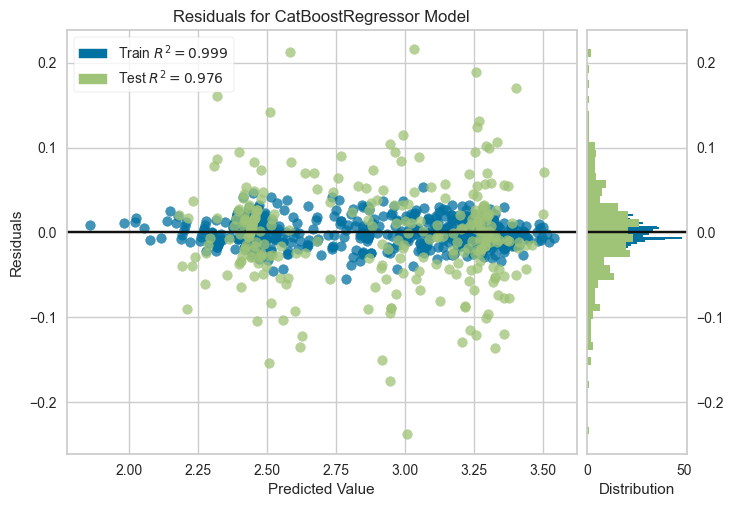

In [12]:
s.plot_model(tuned_catboost, plot = 'residuals')

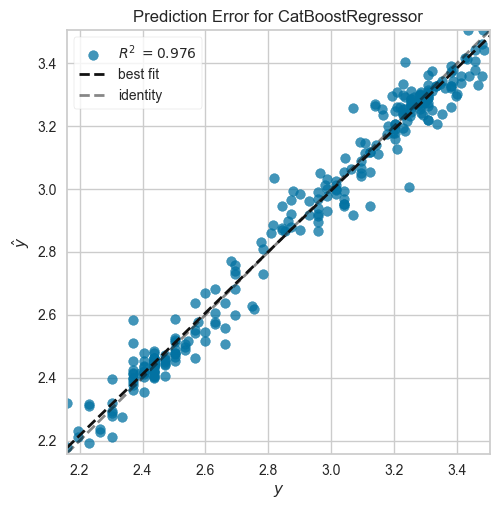

In [13]:
s.plot_model(tuned_catboost, plot = 'error')

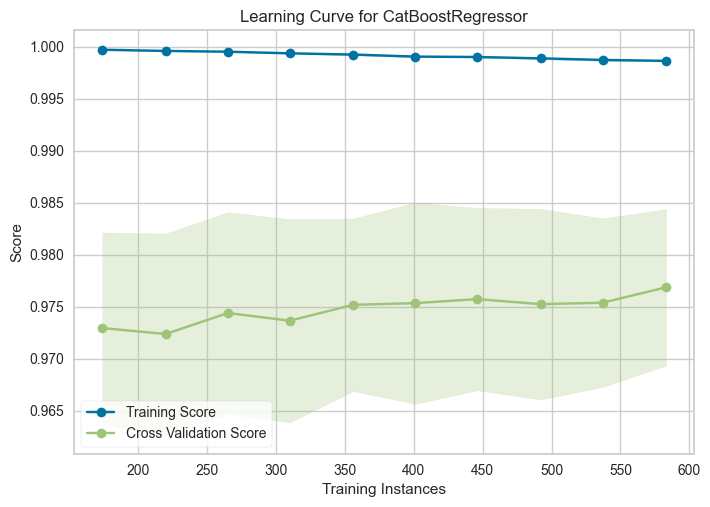

In [14]:
s.plot_model(tuned_catboost, plot = 'learning')


## Lightgbm

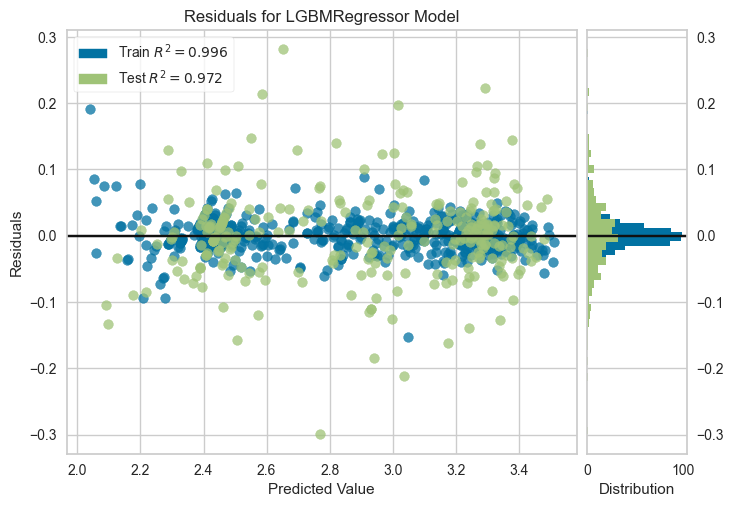

In [15]:
s.plot_model(tuned_lightgbm, plot = 'residuals')

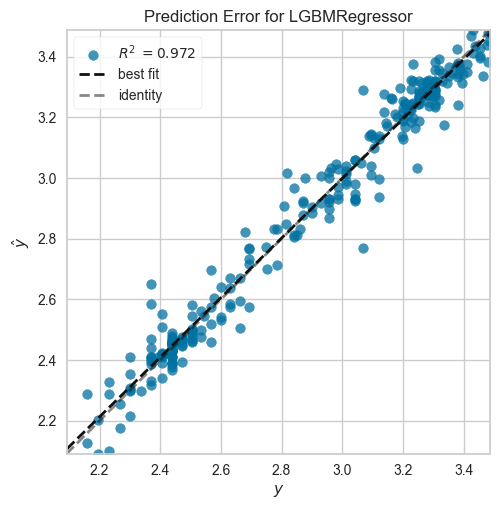

In [16]:
s.plot_model(tuned_lightgbm, plot = 'error')

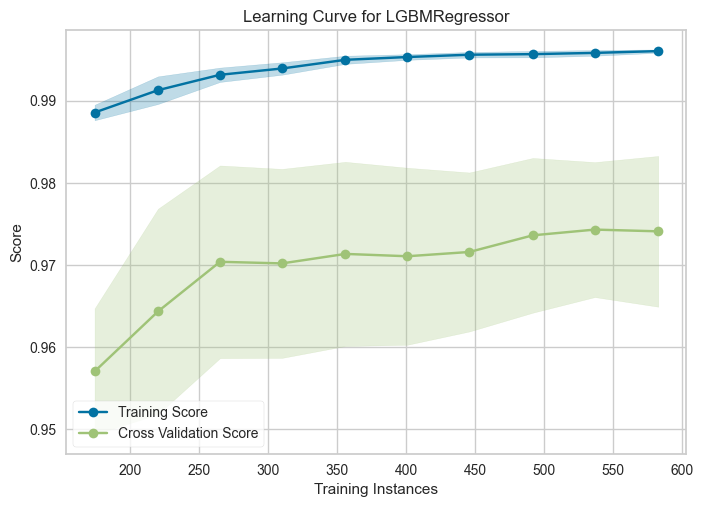

In [17]:
s.plot_model(tuned_lightgbm, plot = 'learning')


## Xgboost

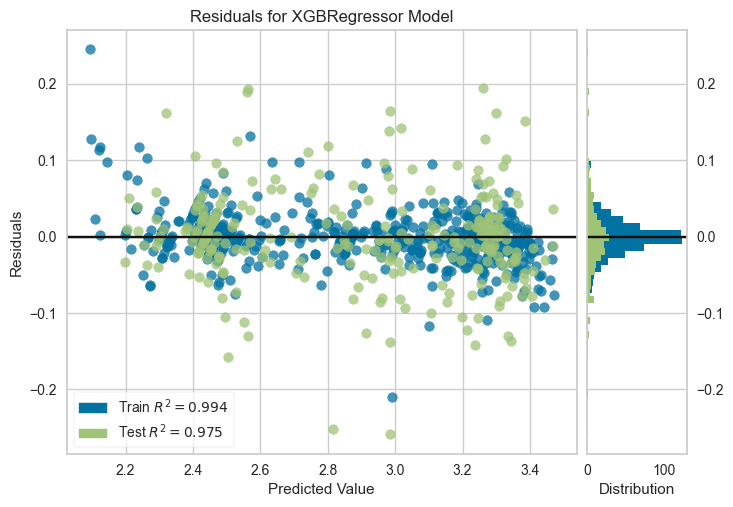

In [18]:
s.plot_model(tuned_xgboost, plot = 'residuals')

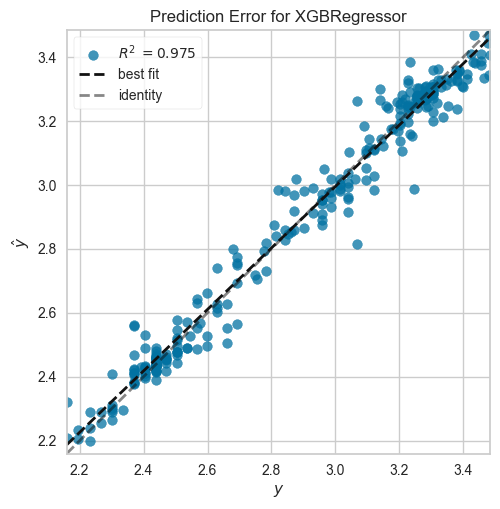

In [19]:
s.plot_model(tuned_xgboost, plot = 'error')

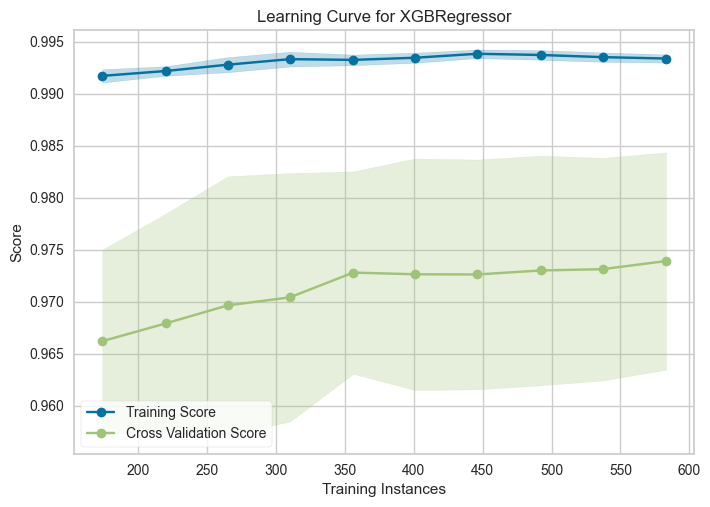

In [20]:
s.plot_model(tuned_xgboost, plot = 'learning')

# Interpret models

## Catboost

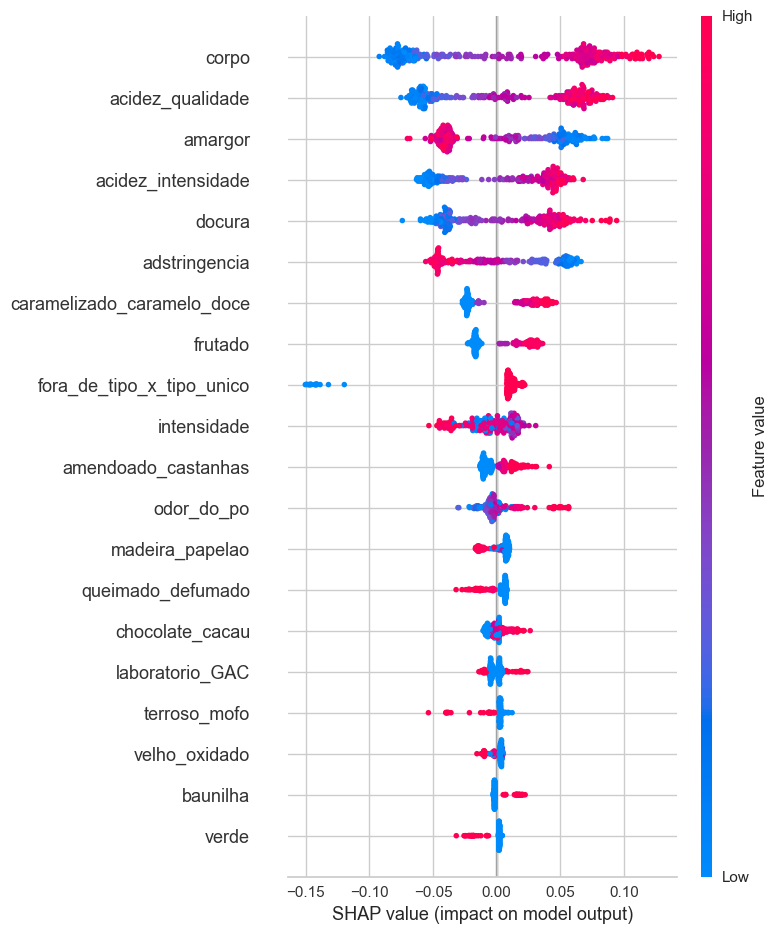

In [21]:
s.interpret_model(tuned_catboost)

## Lightgbm

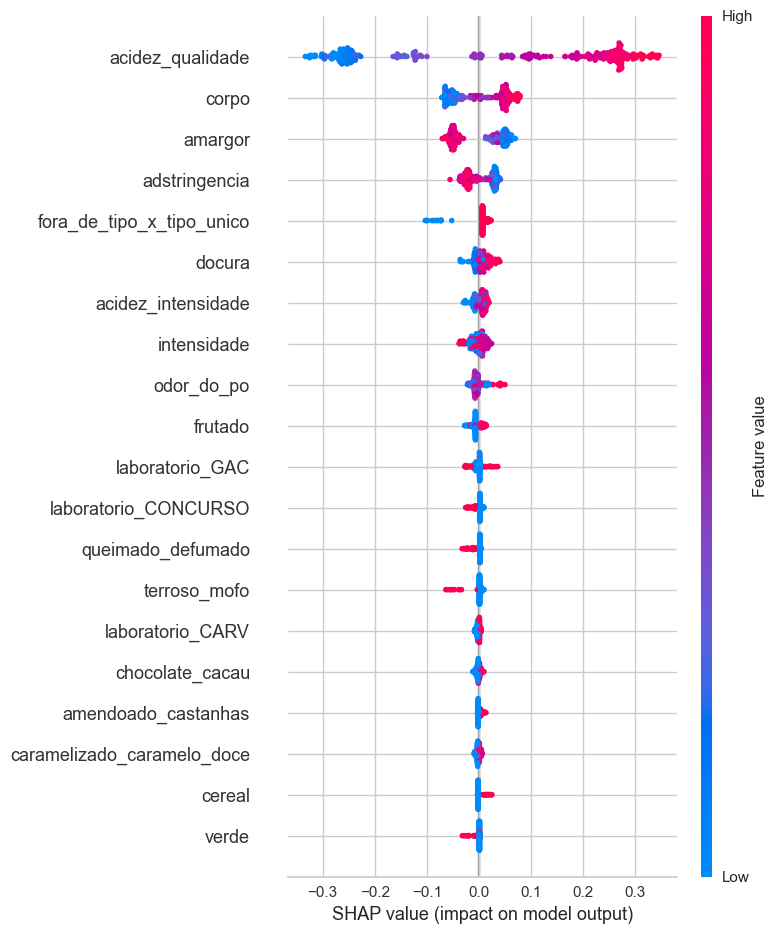

In [22]:
s.interpret_model(tuned_lightgbm)

## Xgboost

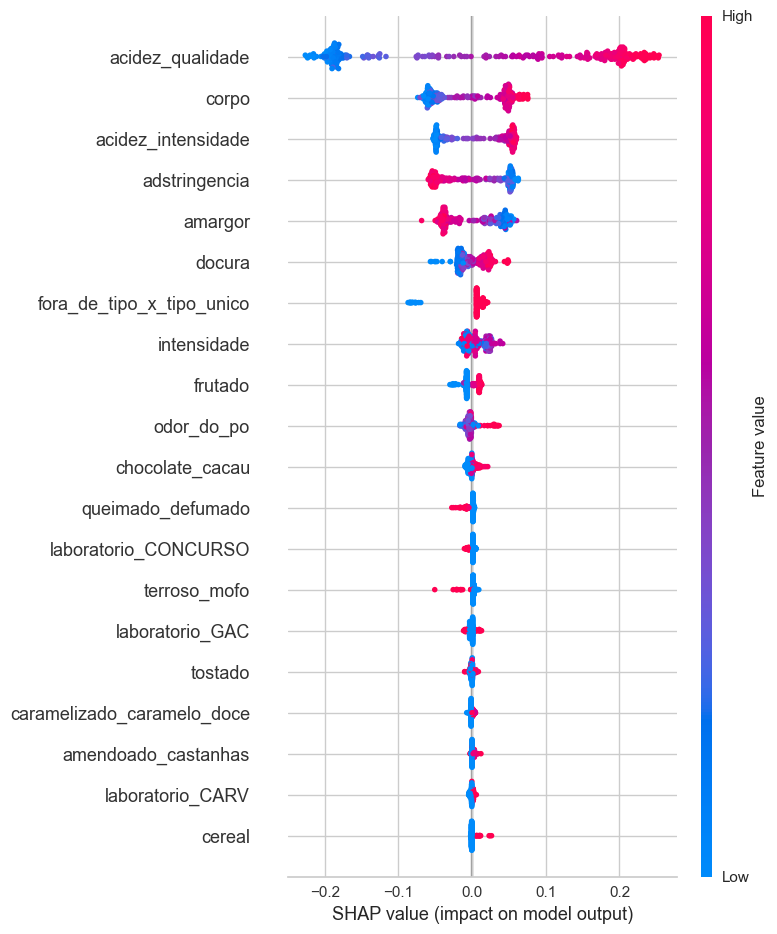

In [23]:
s.interpret_model(tuned_xgboost)